In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("seaborn-v0_8")
sns.set_palette("deep")
pd.set_option("display.max_columns", None)

In [3]:
file_path = "Talent_Academy_Case_DT_2025.xlsx"
df = pd.read_excel(file_path)

In [4]:
print(" İlk 5 gözlem:")
display(df.head())

 İlk 5 gözlem:


,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [5]:
print("\n Veri seti bilgileri:")
df.info()


 Veri seti bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


In [6]:
df["Cinsiyet"].value_counts()

Cinsiyet
Kadın    1274
Erkek     792
Name: count, dtype: int64

In [7]:
df["KanGrubu"].value_counts()

KanGrubu
0 Rh+     579
A Rh+     540
B Rh+     206
AB Rh+     80
B Rh-      68
A Rh-      53
0 Rh-      26
AB Rh-      8
Name: count, dtype: int64

In [8]:
df["KronikHastalik"].value_counts()

KronikHastalik
Myastenia gravis                                                                38
Aritmi                                                                          36
Fascioscapulohumeral Distrofi                                                   36
Hipertiroidizm                                                                  34
Limb-Girdle Musküler Distrofi, Astım                                            34
                                                                                ..
Aritmi, Diyabet, Kalp yetmezliği, Hiportiroidizm                                 1
Fascioscapulohumeral Distrofi, Hiportiroidizm, Limb-Girdle Musküler Distrofi     1
Fascioscapulohumeral Distrofi, Myastenia gravis                                  1
Polimiyozit, Diyabet, Becker Musküler Distrofisi                                 1
Becker Musküler Distrofisi, Hiportiroidizm, Kalp yetmezliği                      1
Name: count, Length: 220, dtype: int64

In [9]:
import pandas as pd
import unicodedata

def strip_accents(text):
    
    return ''.join(ch for ch in unicodedata.normalize('NFKD', text) if not unicodedata.combining(ch))

def clean_and_binarize_chronic(df, col="KronikHastalik"):
    
    mapping = {
        "hipertiroidizm": "hipertiroidizm",
        "hiportiroidizm": "hipotiroidizm",  
        "diyabet": "diyabet",
        "astım": "astım",
        "aritmi": "aritmi",
        "kalp yetmezliği": "kalp yetmezliği",
        "myastenia gravis": "myastenia gravis",
        "becker musküler distrofi": "becker musküler distrofi",
        "fascioscapulohumeral distrofi": "fascioscapulohumeral distrofi",
        "limb-girdle musküler distrofi": "limb-girdle musküler distrofi",
        "polimiyozit": "polimiyozit"
        
    }

    cleaned_list = []

    for entry in df[col].fillna(""):
        if entry == "":
            cleaned_list.append([])
            continue

        
        items = [x.strip().lower() for x in entry.split(",")]

        
        items = [strip_accents(x) for x in items]

        
        mapped = [mapping.get(x, x) for x in items]

        
        unique_vals = list(set(mapped))

        cleaned_list.append(unique_vals)

    
    df[col + "_cleaned"] = cleaned_list

    
    all_unique = sorted(set(sum(cleaned_list, [])))
    for val in all_unique:
        colname = val.replace(" ", "_")  
        df[f"{col}_{colname}"] = df[col + "_cleaned"].apply(lambda x: 1 if val in x else 0)

    return df

In [10]:
df = clean_and_binarize_chronic(df, col="KronikHastalik")


print(df["KronikHastalik_cleaned"].head())
print(df.filter(like="KronikHastalik_").head())

0    [hipotiroidizm, becker muskuler distrofisi, ka...
1    [myastenia gravis, hipertansiyon, becker musku...
2    [myastenia gravis, hipertansiyon, becker musku...
3    [myastenia gravis, hipertansiyon, becker musku...
4    [myastenia gravis, hipertansiyon, becker musku...
Name: KronikHastalik_cleaned, dtype: object
                              KronikHastalik_cleaned  KronikHastalik_aritmi  \
0  [hipotiroidizm, becker muskuler distrofisi, ka...                      0   
1  [myastenia gravis, hipertansiyon, becker musku...                      0   
2  [myastenia gravis, hipertansiyon, becker musku...                      0   
3  [myastenia gravis, hipertansiyon, becker musku...                      0   
4  [myastenia gravis, hipertansiyon, becker musku...                      0   

   KronikHastalik_astım  KronikHastalik_becker_muskuler_distrofisi  \
0                     0                                          1   
1                     0                                          1

In [11]:
df["Bolum"].value_counts()

Bolum
Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    2045
Ortopedi Ve Travmatoloji                            88
İç Hastalıkları                                     32
Nöroloji                                            17
Kardiyoloji                                         11
Göğüs Hastalıkları                                   8
Laboratuar                                           7
Genel Cerrahi                                        6
Tıbbi Onkoloji                                       6
Kalp Ve Damar Cerrahisi                              4
Name: count, dtype: int64

In [12]:
df["Alerji"].value_counts()

Alerji
Polen                198
POLEN                134
Toz                  119
ARVELES,CORASPIN     102
Sucuk                 91
NOVALGIN              90
Polen,Yer Fıstığı     83
TOZ                   74
SUCUK                 73
Novalgin              49
GRİPİN                47
Volteren              30
Voltaren              26
GRIPIN                22
VOLTAREN              19
POLEN,TOZ             13
VOLTAREN,Polen        11
Toz,TOZ                9
TOZ,Novalgin           7
Polen,NOVALGIN         7
Novalgin,Polen         6
TOZ,VOLTAREN           5
Voltaren,POLEN         5
Polen,GRIPIN           5
POLEN,Voltaren         5
NOVALGIN,Polen         5
VOLTAREN,POLEN         5
Volteren,GRİPİN        5
TOZ,POLEN              5
Polen,TOZ              5
Novalgin,Sucuk         5
SUCUK,GRIPIN           5
NOVALGIN,Novalgin      5
Polen,Toz              5
VOLTAREN,Toz           5
Polen,Voltaren         5
TOZ,GRİPİN             3
POLEN,NOVALGIN         3
Name: count, dtype: int64

In [13]:
import pandas as pd
import unicodedata

def strip_accents(text):
    
    return ''.join(ch for ch in unicodedata.normalize('NFKD', text) if not unicodedata.combining(ch))

def clean_and_binarize_allergy(df, col="Alerji"):
    mapping = {
        "polen": "polen",
        "toz": "toz",
        "novalgin": "novalgin",
        "voltaren": "voltaren",
        "volteren": "voltaren",  
        "gripin": "gripin",
        "sucuk": "sucuk",
        "arveles": "arveles",
        "coraspin": "coraspin",
        "yer fıstığı": "yer fıstığı"
    }

    cleaned_list = []

    for entry in df[col].fillna(""):
        if entry == "":
            cleaned_list.append([])
            continue

        
        items = [x.strip().lower() for x in entry.split(",")]

        
        items = [strip_accents(x) for x in items]

        
        mapped = [mapping.get(x, x) for x in items]

        
        unique_vals = list(set(mapped))

        cleaned_list.append(unique_vals)

    
    df[col + "_cleaned"] = cleaned_list

   
    all_unique = sorted(set(sum(cleaned_list, [])))
    for val in all_unique:
        df[f"{col}_{val}"] = df[col + "_cleaned"].apply(lambda x: 1 if val in x else 0)

    return df
       

In [14]:
# Fonksiyonu çalıştır
df = clean_and_binarize_allergy(df, col="Alerji")

# 1️⃣ Kaç farklı kategori var?
print("Toplam kategori sayısı:", len(df["Alerji_cleaned"].explode().unique()))

# 2️⃣ Tüm unique kategoriler
print("\nTemizlenmiş unique kategoriler:")
print(sorted(df["Alerji_cleaned"].explode().dropna().unique()))

# 3️⃣ Binary kolonlar nasıl olmuş → ilk 5 satır
print("\nBinary kolonlardan örnek (ilk 5 satır):")
print(df.filter(like="Alerji_").head())
    

Toplam kategori sayısı: 10

Temizlenmiş unique kategoriler:
['arveles', 'coraspin', 'gripin', 'novalgin', 'polen', 'sucuk', 'toz', 'voltaren', 'yer fıstıgı']

Binary kolonlardan örnek (ilk 5 satır):
  Alerji_cleaned  Alerji_arveles  Alerji_coraspin  Alerji_gripin  \
0          [toz]               0                0              0   
1             []               0                0              0   
2             []               0                0              0   
3             []               0                0              0   
4             []               0                0              0   

   Alerji_novalgin  Alerji_polen  Alerji_sucuk  Alerji_toz  Alerji_voltaren  \
0                0             0             0           1                0   
1                0             0             0           0                0   
2                0             0             0           0                0   
3                0             0             0           0                0 

In [15]:
df["Alerji_cleaned_str"] = df["Alerji_cleaned"].apply(lambda x: ",".join(sorted(x)))


counts = df["Alerji_cleaned_str"].value_counts()
print(counts)

Alerji_cleaned_str
                     944
polen                332
toz                  202
sucuk                164
novalgin             144
arveles,coraspin     102
polen,yer fıstıgı     83
voltaren              75
gripin                69
polen,voltaren        31
polen,toz             28
novalgin,polen        21
toz,voltaren          10
novalgin,toz           7
gripin,sucuk           5
novalgin,sucuk         5
gripin,polen           5
gripin,voltaren        5
gripin,toz             3
Name: count, dtype: int64


In [16]:
df["Alerji_cleaned"].head(10)

0                [toz]
1                   []
2                   []
3                   []
4                   []
5                   []
6    [novalgin, polen]
7    [novalgin, polen]
8    [novalgin, polen]
9           [novalgin]
Name: Alerji_cleaned, dtype: object

In [17]:
df["Alerji_polen"].sum()

500

In [18]:
df["Tanilar"].value_counts()

Tanilar
DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE                                                                        149
Omuzun darbe sendromu                                                                                     128
İntervertebral disk bozuklukları, tanımlanmamış                                                           116
DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE                                                                      96
Eklem ağrısı                                                                                               51
                                                                                                         ... 
Fibromiyalji , birden fazla yer,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE                                       1
İntervertebral disk bozuklukları, tanımlanmamış                                                             1
İntervertebral disk bozuklukları,,  tanımlanmamış                                                           1
Sp

In [19]:
def clean_and_binarize_diagnosis(df, col="Tanilar"):
    mapping = {
        "dorsalji, diğer, lumbosakral bölge": "dorsalji - lumbosakral",
        "dorsalji, diğer, servikotorasik bölge": "dorsalji - servikotorasik",
        "omuzun darbe sendromu": "omuz darbe sendromu",
        "intervertebral disk bozuklukları, tanımlanmamış": "disk bozukluğu - tanımsız",
        "fibromiyalji": "fibromiyalji",
        "spinal stenoz": "spinal stenoz",
        "spondilolistezis": "spondilolistezis",
        "ekstremite ağrısı": "ekstremite ağrısı",
        
    }

    cleaned_list = []

    for entry in df[col].fillna(""):
        if entry.strip() == "":
            cleaned_list.append([])
            continue

       
        items = [x.strip().lower() for x in entry.split(",") if x.strip() != ""]

        
        items = [strip_accents(x) for x in items]

        
        mapped = [mapping.get(x, x) for x in items]

        
        unique_vals = list(set(mapped))

        cleaned_list.append(unique_vals)

   
    df[col + "_cleaned"] = cleaned_list

   
    all_unique = sorted(set(sum(cleaned_list, [])))
    for val in all_unique:
        colname = val.replace(" ", "_")  
        df[f"{col}_{colname}"] = df[col + "_cleaned"].apply(lambda x: 1 if val in x else 0)

    return df

In [21]:
df = clean_and_binarize_diagnosis(df, col="Tanilar")


print(df["Tanilar_cleaned"].head())
print(df.filter(like="Tanilar_").head())

0         [ayak bilegi ve ayagın yuzeysel yaralanması]
1    [servikotorasik bolge, diger, dorsalji, omuz d...
2    [servikotorasik bolge, diger, dorsalji, omuz d...
3    [servikotorasik bolge, diger, dorsalji, omuz d...
4    [servikotorasik bolge, diger, dorsalji, omuz d...
Name: Tanilar_cleaned, dtype: object
                                     Tanilar_cleaned  Tanilar_'dorsalji  \
0       [ayak bilegi ve ayagın yuzeysel yaralanması]                  0   
1  [servikotorasik bolge, diger, dorsalji, omuz d...                  0   
2  [servikotorasik bolge, diger, dorsalji, omuz d...                  0   
3  [servikotorasik bolge, diger, dorsalji, omuz d...                  0   
4  [servikotorasik bolge, diger, dorsalji, omuz d...                  0   

   Tanilar_akromiyoklavikuler_eklem_burkulma_ve_gerilmesi  \
0                                                  0        
1                                                  0        
2                                                  0  

In [22]:
df = clean_and_binarize_diagnosis(df, col="Tanilar")


print("Toplam kategori sayısı:", len(df["Tanilar_cleaned"].explode().unique()))


print("\nTemizlenmiş unique kategoriler:")
print(sorted(df["Tanilar_cleaned"].explode().dropna().unique()))


print("\nBinary kolonlardan örnek (ilk 5 satır):")
print(df.filter(like="Tanilar_").head())

Toplam kategori sayısı: 280

Temizlenmiş unique kategoriler:
["'dorsalji", 'akromiyoklavikuler eklem burkulma ve gerilmesi', 'akut apandisit', 'akut peptik ulser', 'algonorodistrofi', 'allerjik rinit', 'alt ekstremite mononoropatileri', 'anksiyete bozuklugu', 'anus ve rektumun diger tanımlanmıs hastalıkları', 'aort stenozu', 'artikuler kikirdak diger bozukluklari', 'artroz', 'asil tendiniti', 'asil tendon yaralanması', 'astım', 'aterosklerotik kardiyovaskuler hastalık', 'atrial fibrilasyon ve flutter', 'ayak bilegi haric', 'ayak bilegi ve ayagın diger ve tanımlanmamıs yaralanmaları', 'ayak bilegi ve ayagın yuzeysel yaralanması', 'ayak bilegi ve ayak', 'ayak bilegi ve ayak duzeyinde derin peroneal sinir yaralanması', 'ayak bilegi ve ayak duzeyinde eklem ve ligamentlerin cıkık', 'ayak bilegi ve ayak duzeyinde kas ve tendon yaralanması', 'ayak kırıgı', 'ayak ve ayak bilegi', 'bacak', 'baldır duzeyinde peroneal sinir yaralanması', 'bas agrısı', 'baska yerde sınıflanmamıs', 'baska yerde sın

In [23]:
print("KronikHastalik unique kombinasyonları:")
print(df['KronikHastalik_cleaned'].value_counts().head(10))

print("\nAlerji unique kombinasyonları:")
print(df['Alerji_cleaned'].value_counts().head(10))

print("\nTanilar unique kombinasyonları:")
print(df['Tanilar_cleaned'].value_counts().head(10))

KronikHastalik unique kombinasyonları:
KronikHastalik_cleaned
[]                                        611
[myastenia gravis]                         38
[aritmi]                                   36
[fascioscapulohumeral distrofi]            36
[hipertiroidizm]                           34
[limb-girdle muskuler distrofi, astım]     34
[kalp yetmezligi]                          33
[hipertiroidizm, aritmi]                   32
[hipertansiyon]                            31
[astım]                                    30
Name: count, dtype: int64

Alerji unique kombinasyonları:
Alerji_cleaned
[]                      944
[polen]                 332
[toz]                   202
[sucuk]                 164
[novalgin]              144
[coraspin, arveles]     102
[yer fıstıgı, polen]     83
[voltaren]               75
[gripin]                 69
[voltaren, polen]        31
Name: count, dtype: int64

Tanilar unique kombinasyonları:
Tanilar_cleaned
[lumbosakral bolge, diger, dorsalji]              

In [24]:
df["TedaviAdi"].value_counts()

TedaviAdi
Dorsalji -Boyun+trapez        231
İV DİSK BOZUKLUĞU-BEL         200
Dorsalji 1                    140
Dorsalji-Bel                  120
Gonartroz-Meniskopati          95
                             ... 
Sol  ÖÇB Rehabilitasyonu-1      1
Aşil Tendiniti sol-1            1
Spinal manüpilasyon             1
İmpingement op izometrik        1
Ayak Bileği                     1
Name: count, Length: 244, dtype: int64

In [25]:
df["TedaviSuresi"].value_counts()

TedaviSuresi
15 Seans    1670
10 Seans     175
20 Seans     113
2 Seans       45
17 Seans      36
4 Seans       35
16 Seans      27
21 Seans      20
18 Seans      20
5 Seans       17
30 Seans      12
19 Seans      10
11 Seans       9
3 Seans        7
8 Seans        6
7 Seans        5
29 Seans       5
25 Seans       5
22 Seans       5
37 Seans       5
1 Seans        3
6 Seans        3
14 Seans       2
Name: count, dtype: int64

In [26]:
df["UygulamaYerleri"].value_counts()

UygulamaYerleri
Bel                                                528
Boyun                                              363
Diz                                                177
Sol Omuz Bölgesi                                   137
Sağ Omuz Bölgesi                                   127
Sol El Bilek Bölgesi                                83
Sırt                                                75
Sağ Ayak Bileği Bölgesi                             61
Tüm Vücut Bölgesi                                   58
Sol Ayak Bileği Bölgesi                             58
Sol Diz Bölgesi                                     49
Sağ El Bilek Bölgesi                                47
Sol Kalça Bölgesi                                   30
Sağ Diz Bölgesi                                     29
Sağ Kalça Bölgesi                                   29
Kalça                                               28
Sağ Kalça Bölgesi,Sol Kalça Bölgesi                 17
Dirsek                                           

In [27]:
df["UygulamaSuresi"].value_counts()

UygulamaSuresi
20 Dakika    1535
5 Dakika      360
10 Dakika     221
15 Dakika      89
30 Dakika      11
45 Dakika      10
25 Dakika       5
40 Dakika       2
3 Dakika        1
8 Dakika        1
Name: count, dtype: int64

In [28]:
numeric_cols = ['HastaNo', 'Yas']
print("Sayısal değişkenlerin özet istatistikleri:")
display(df[numeric_cols].describe().T)

Sayısal değişkenlerin özet istatistikleri:


,count,mean,std,min,25%,50%,75%,max
HastaNo,2235.0,145333.100224,115.214248,145134.0,145235.0,145331.0,145432.0,145537.0
Yas,2235.0,47.327069,15.208634,2.0,38.0,46.0,56.0,92.0


In [30]:
def clean_to_list(x):
    if x is None or (isinstance(x, float) and np.isnan(x)):
        return []
    elif isinstance(x, list):
        return x
    else:
        
        return [i.strip() for i in str(x).split(",") if i.strip() != ""]


for col in ['Alerji_cleaned', 'KronikHastalik_cleaned', 'Tanilar_cleaned']:
    df[col] = df[col].apply(clean_to_list)


def multi_label_binarizer(df, column_name, prefix=None):
    unique_vals = sorted(set([item for sublist in df[column_name] for item in sublist]))
    for val in unique_vals:
        col_name = f"{prefix}_{val}" if prefix else f"{column_name}_{val}"
        df[col_name] = df[column_name].apply(lambda x: 1 if val in x else 0)
    return df[[f"{prefix}_{val}" if prefix else f"{column_name}_{val}" for val in unique_vals]].mean().sort_values(ascending=False)


alerji_oran = multi_label_binarizer(df, 'Alerji_cleaned', prefix='Alerji')
kronik_oran = multi_label_binarizer(df, 'KronikHastalik_cleaned', prefix='KronikHastalik')
tanilar_oran = multi_label_binarizer(df, 'Tanilar_cleaned', prefix='Tanilar')

print("=== Alerji_cleaned ===")
display(alerji_oran)
print("=== KronikHastalik_cleaned ===")
display(kronik_oran)
print("=== Tanilar_cleaned ===")
display(tanilar_oran)

=== Alerji_cleaned ===


Alerji_polen          0.223714
Alerji_toz            0.111857
Alerji_novalgin       0.079195
Alerji_sucuk          0.077852
Alerji_voltaren       0.054139
Alerji_arveles        0.045638
Alerji_coraspin       0.045638
Alerji_gripin         0.038926
Alerji_yer fıstıgı    0.037136
dtype: float64

=== KronikHastalik_cleaned ===


KronikHastalik_aritmi                           0.176734
KronikHastalik_hipotiroidizm                    0.171365
KronikHastalik_limb-girdle muskuler distrofi    0.169575
KronikHastalik_astım                            0.157047
KronikHastalik_hipertiroidizm                   0.146309
KronikHastalik_myastenia gravis                 0.141387
KronikHastalik_diyabet                          0.137808
KronikHastalik_duchenne muskuler distrofisi     0.137360
KronikHastalik_fascioscapulohumeral distrofi    0.136018
KronikHastalik_kalp yetmezligi                  0.134676
KronikHastalik_hipertansiyon                    0.127517
KronikHastalik_polimiyozit                      0.123043
KronikHastalik_becker muskuler distrofisi       0.108725
KronikHastalik_guatr                            0.001342
KronikHastalik_hipotirodizm                     0.001342
dtype: float64

=== Tanilar_cleaned ===


Tanilar_dorsalji                            0.319463
Tanilar_diger                               0.308277
Tanilar_tanımlanmamıs                       0.176286
Tanilar_omuz darbe sendromu                 0.122148
Tanilar_intervertebral disk bozuklukları    0.120805
                                              ...   
Tanilar_servikal b`olge                     0.000447
Tanilar_servikal disk bozukluklar‍ı         0.000447
Tanilar_servikoto'rasik bolge               0.000447
Tanilar_serv­ikotorasik bolge               0.000447
Tanilar_​vitaminlerin eksikligi             0.000447
Length: 279, dtype: float64

In [31]:
df['Cinsiyet'] = df['Cinsiyet']
df['KanGrubu']= df['KanGrubu']
df['KronikHastalik']= df['KronikHastalik_cleaned']
df['Bolum'] = df['Bolum']
df['Alerji'] = df['Alerji_cleaned']
df['Tanilar'] = df['Tanilar_cleaned']
df['TedaviAdi'] = df['TedaviAdi']
df['TedaviSuresi'] = df['TedaviSuresi']
df['UygulamaYerleri'] = df['UygulamaYerleri']
df['UygulamaSuresi'] = df['UygulamaSuresi']


df = df[[col for col in df.columns if not col.endswith('_clean')]]



df.to_excel("temiz_veri.xlsx", index=False)

In [32]:
df_temiz = df.copy()

In [33]:
file_path = "Talent_Academy_Case_DT_2025.xlsx" 
df = pd.read_excel(file_path)

In [34]:
missing_counts = df.isnull().sum()
print("Eksik değer sayıları:\n", missing_counts[missing_counts > 0])

Eksik değer sayıları:
 Cinsiyet           169
KanGrubu           675
KronikHastalik     611
Bolum               11
Alerji             944
Tanilar             75
UygulamaYerleri    221
dtype: int64


In [35]:
missing_percent = (missing_counts / len(df)) * 100


missing_df = pd.DataFrame({
    "Eksik Sayısı": missing_counts,
    "Eksik Yüzdesi": missing_percent
})

missing_df = missing_df[missing_df["Eksik Sayısı"] > 0].sort_values("Eksik Sayısı", ascending=False)

print(missing_df)

                 Eksik Sayısı  Eksik Yüzdesi
Alerji                    944      42.237136
KanGrubu                  675      30.201342
KronikHastalik            611      27.337808
UygulamaYerleri           221       9.888143
Cinsiyet                  169       7.561521
Tanilar                    75       3.355705
Bolum                      11       0.492170


C:\Users\zeyne\AppData\Local\Temp\ipykernel_2460\3855604144.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_df_sorted.index, y="Eksik Sayısı", data=missing_df_sorted, palette="viridis")


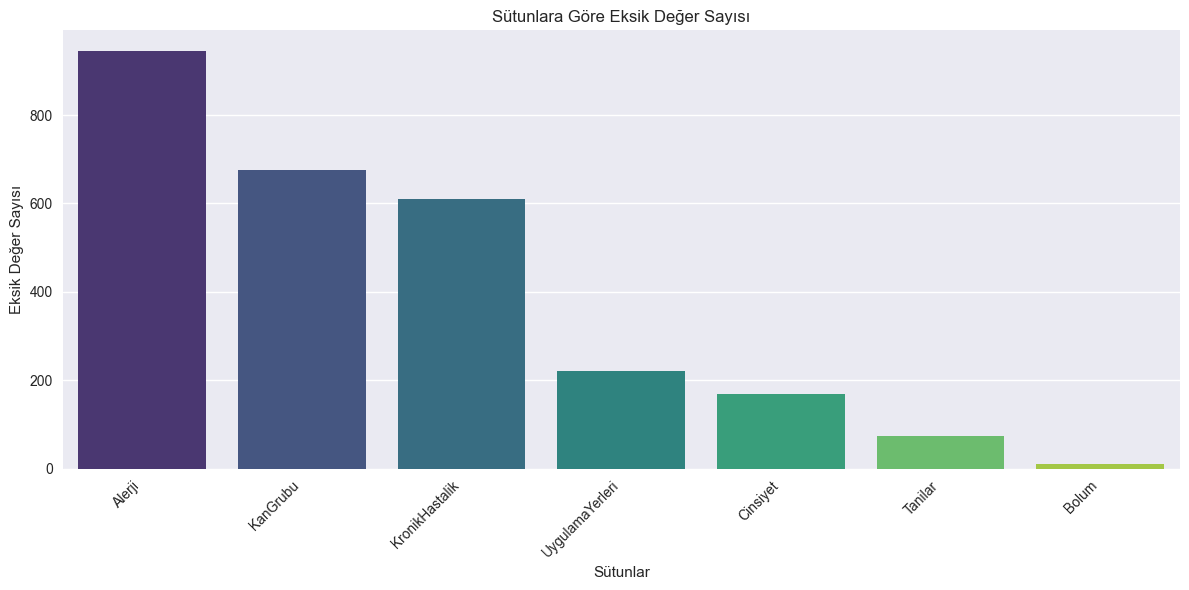

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


missing_df_sorted = missing_df.sort_values("Eksik Sayısı", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=missing_df_sorted.index, y="Eksik Sayısı", data=missing_df_sorted, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Sütunlara Göre Eksik Değer Sayısı")
plt.ylabel("Eksik Değer Sayısı")
plt.xlabel("Sütunlar")
plt.tight_layout()
plt.show()

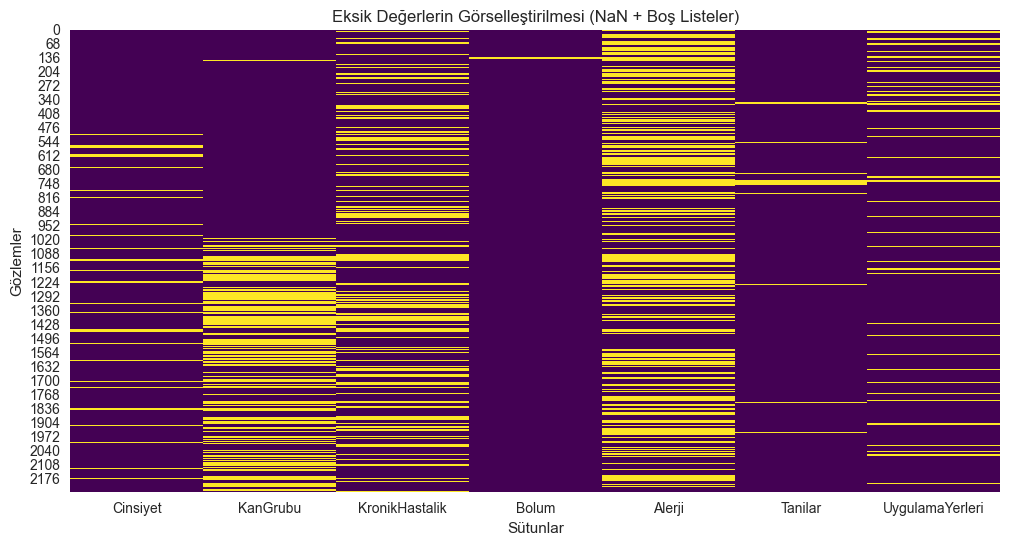

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


missing_mask = df.apply(lambda col: col.isnull() | col.apply(lambda x: x is None or (isinstance(x, list) and len(x) == 0)))


missing_mask = missing_mask.loc[:, missing_mask.any()]

plt.figure(figsize=(12,6))
sns.heatmap(missing_mask, cbar=False, cmap="viridis")
plt.title("Eksik Değerlerin Görselleştirilmesi (NaN + Boş Listeler)")
plt.xlabel("Sütunlar")
plt.ylabel("Gözlemler")
plt.show()

In [38]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns.tolist()

In [39]:
num_cols = [col for col in num_cols if col != "TedaviSuresi"]

In [40]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

In [41]:
real_num_cols = ["Yas", "TedaviSuresi"]  
binary_cols = [col for col in df.columns if "_" in col]


cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
categorical_cols = list(dict.fromkeys(cat_cols + binary_cols))

print("Gerçek sayısal sütunlar:", real_num_cols)
print("Kategorik sütunlar:", categorical_cols)

Gerçek sayısal sütunlar: ['Yas', 'TedaviSuresi']
Kategorik sütunlar: ['Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik', 'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'TedaviSuresi', 'UygulamaYerleri', 'UygulamaSuresi']


SAYİSAL DEĞİŞKENLER İCİN HİSTOGRAM VE BOXPLOT

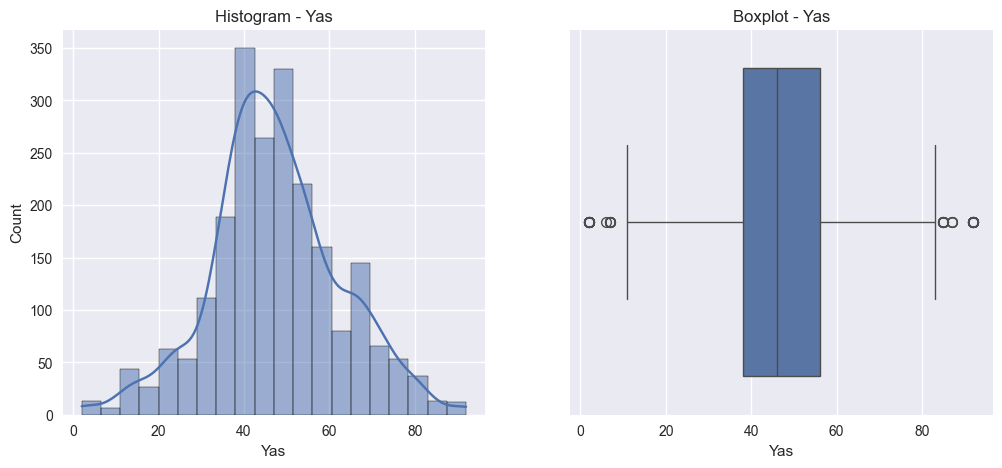

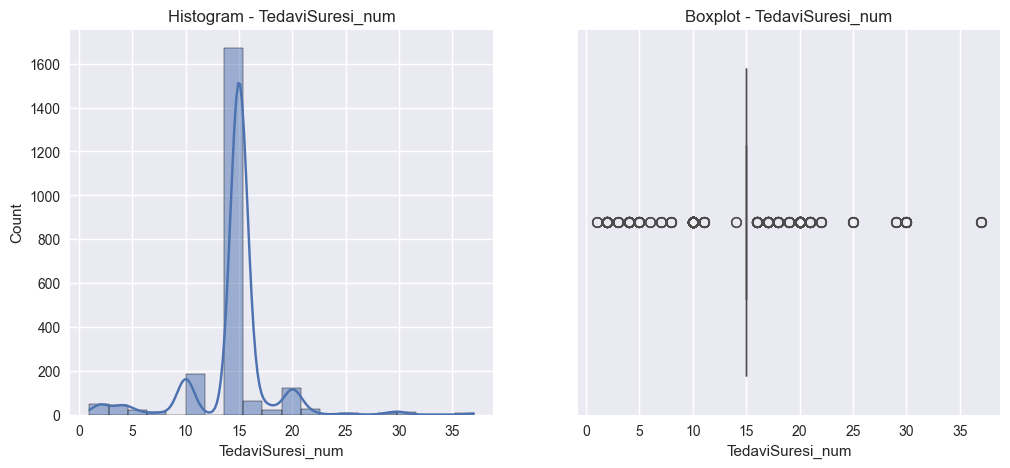

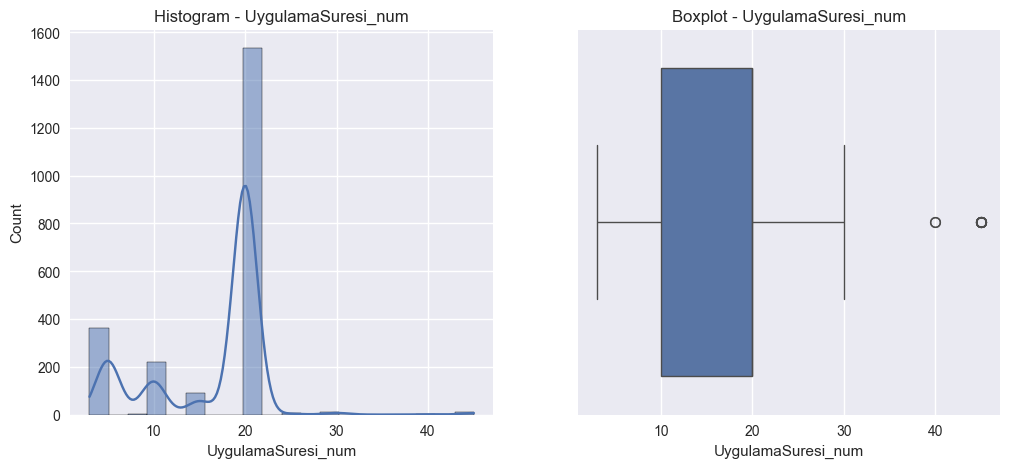

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns


df["TedaviSuresi_num"] = df["TedaviSuresi"].str.extract(r"(\d+)").astype(float)
df["UygulamaSuresi_num"] = df["UygulamaSuresi"].str.extract(r"(\d+)").astype(float)

num_cols = ["Yas", "TedaviSuresi_num", "UygulamaSuresi_num"]

for col in num_cols:
    plt.figure(figsize=(12,5))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Histogram - {col}")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")

    plt.show()

KATEGORİK DEGİSKENLERİN DAGİLİMİ (En çok 15 + Diğer)

In [43]:
def plot_categorical_distribution(df, col, top_n=15):
    ser = df[col].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
    
    
    counts = ser.value_counts()
    
    
    top_counts = counts.head(top_n)
    other_count = counts.iloc[top_n:].sum()
    if other_count > 0:
        top_counts = pd.concat([top_counts, pd.Series({"Diğer": other_count})])
    
    
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_counts.values, y=top_counts.index)
    plt.title(f"{col} Dağılımı (Top {top_n} + Diğer)")
    plt.xlabel("Frekans")
    plt.ylabel(col)
    plt.show()

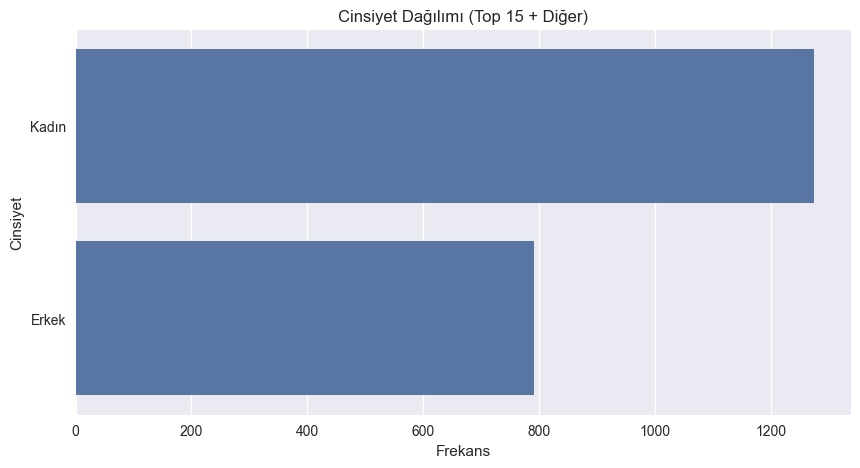

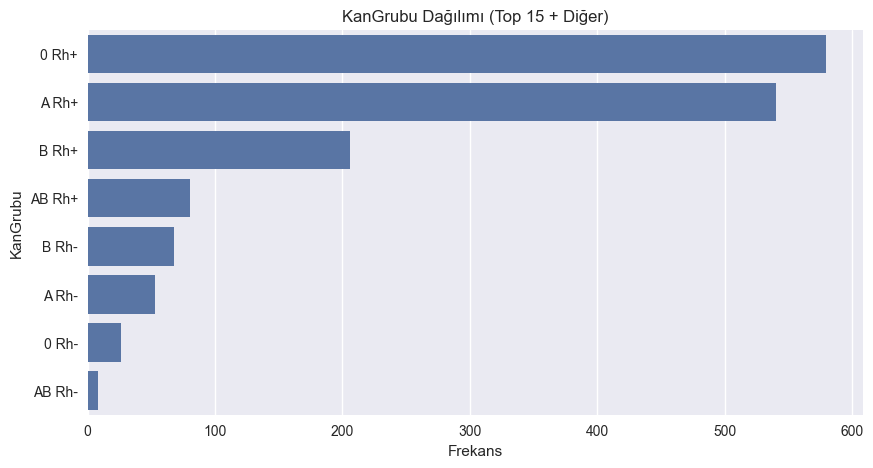

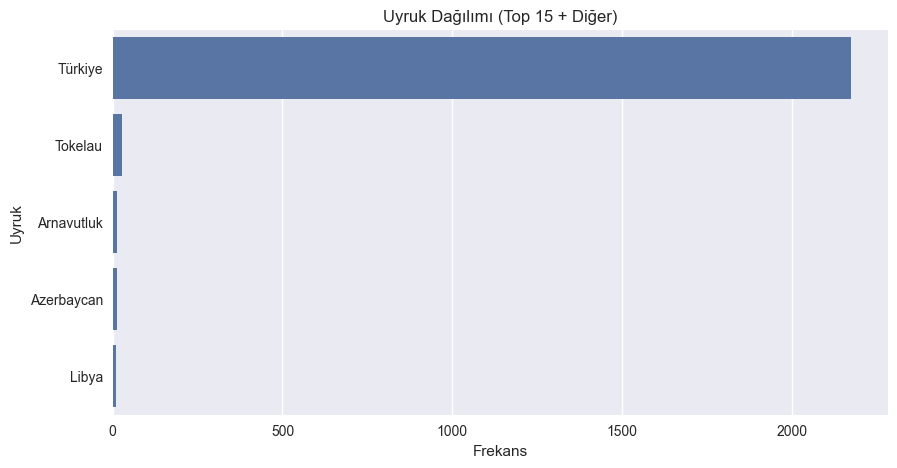

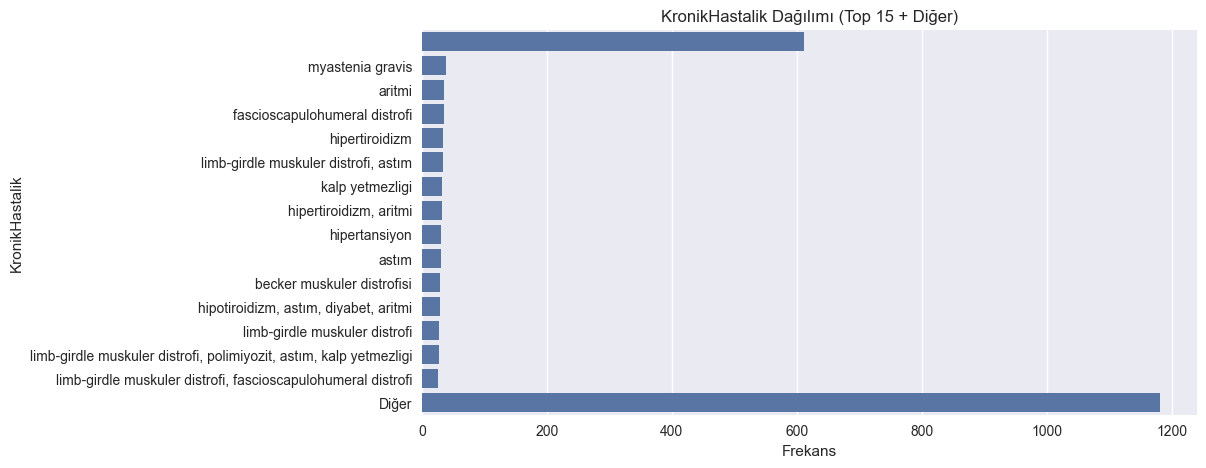

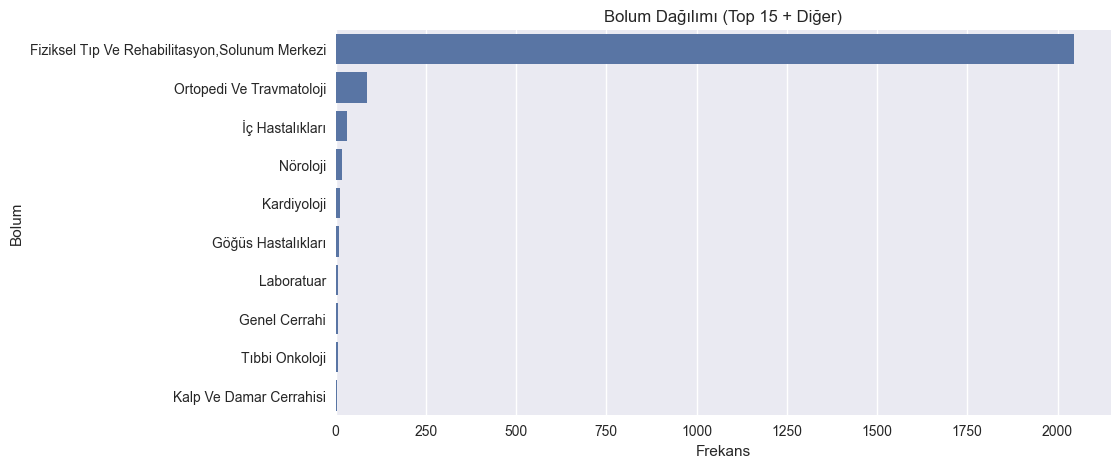

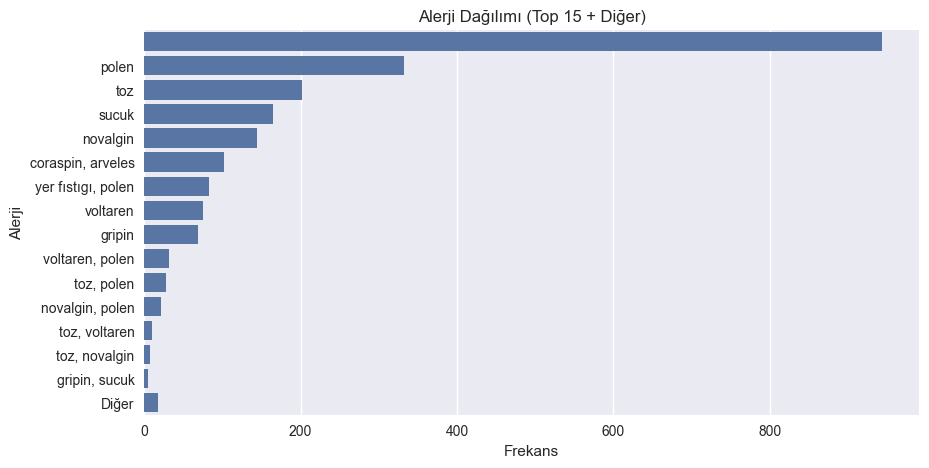

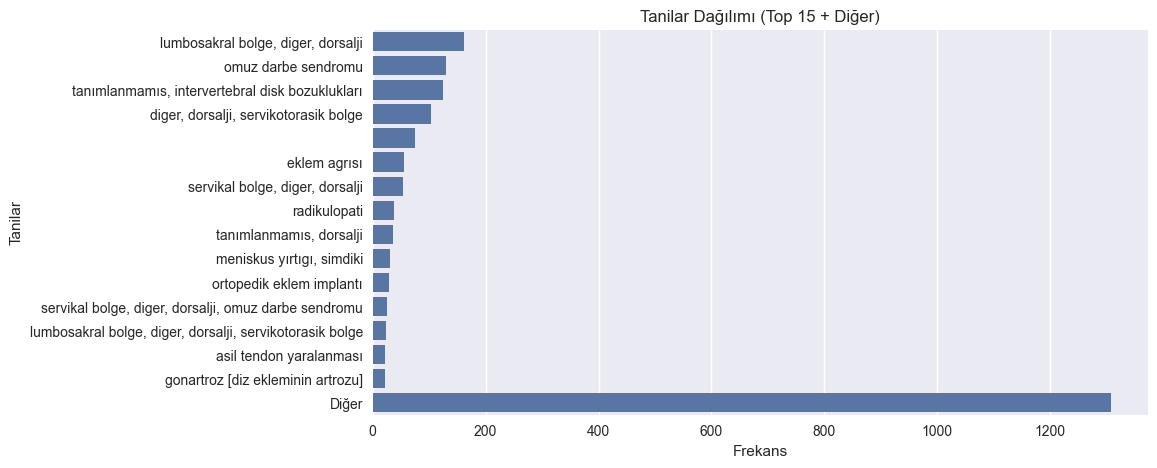

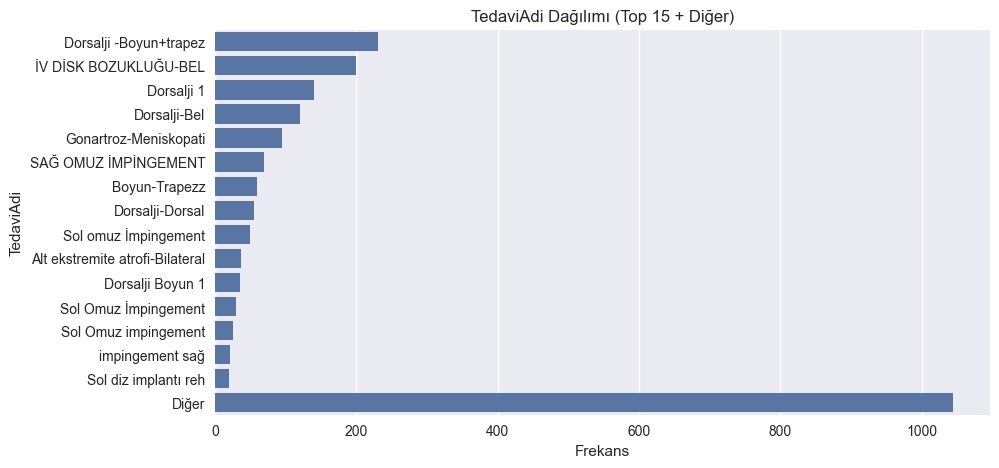

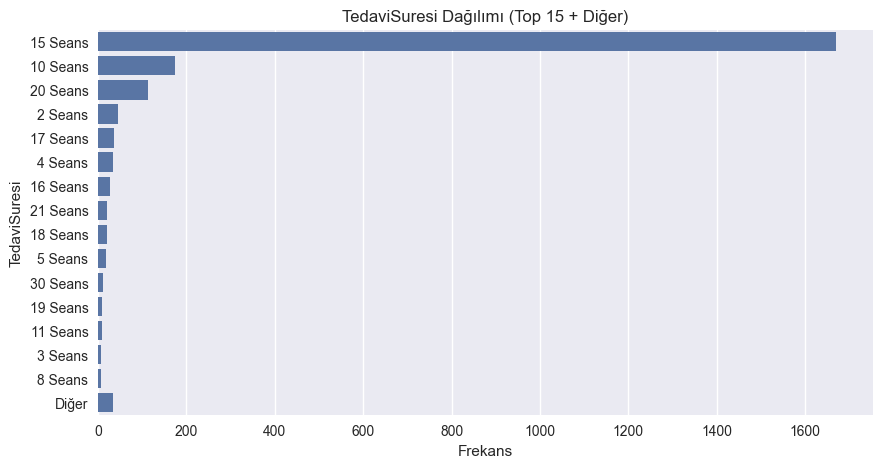

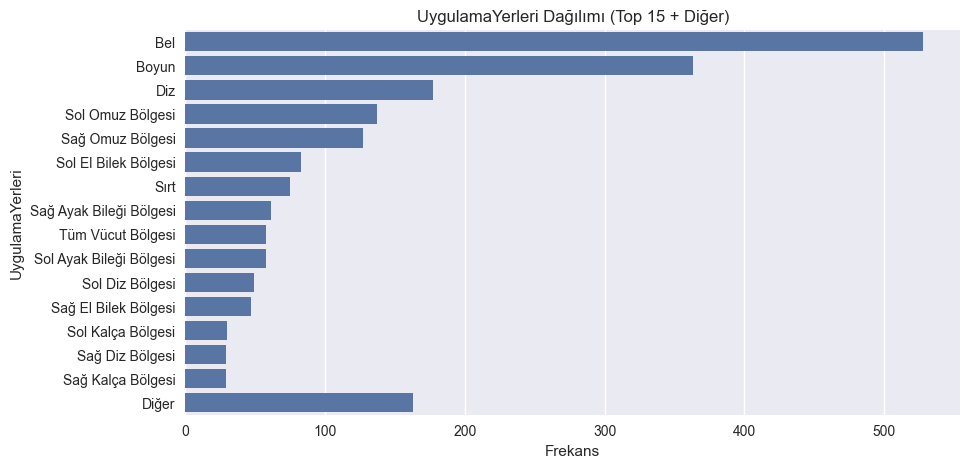

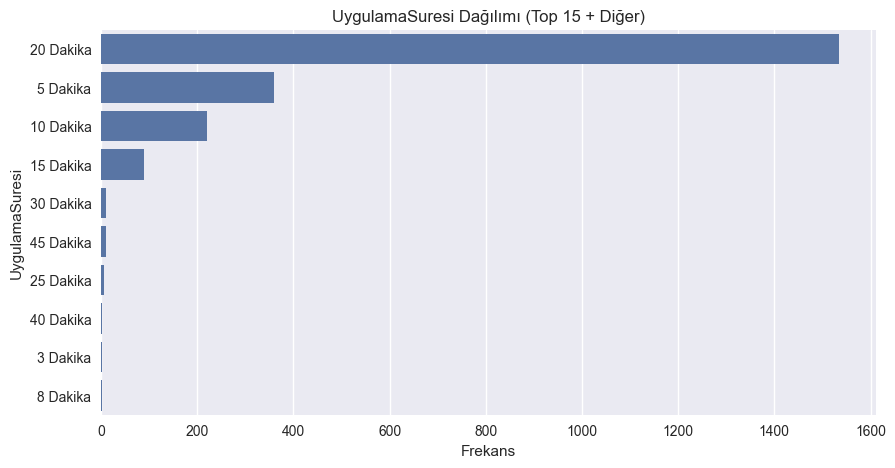

In [44]:
for col in cat_cols:
    plot_categorical_distribution(df_temiz, col)

KATEGORİK DEGİSKENLERİN DAGİLİMİ (En çok 15 + Diğer)

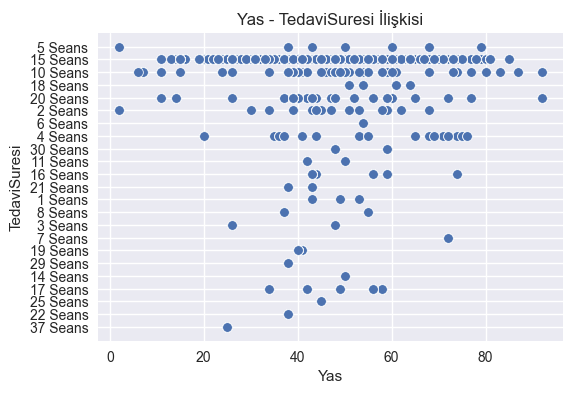

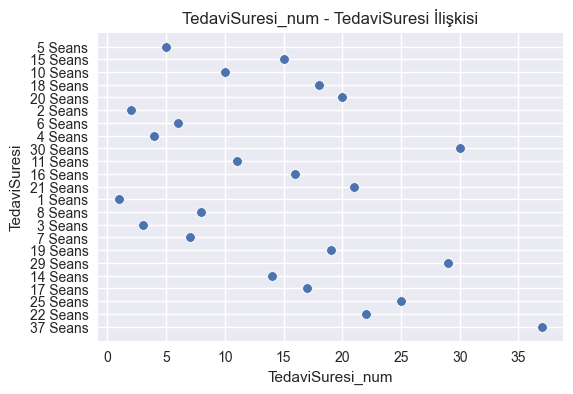

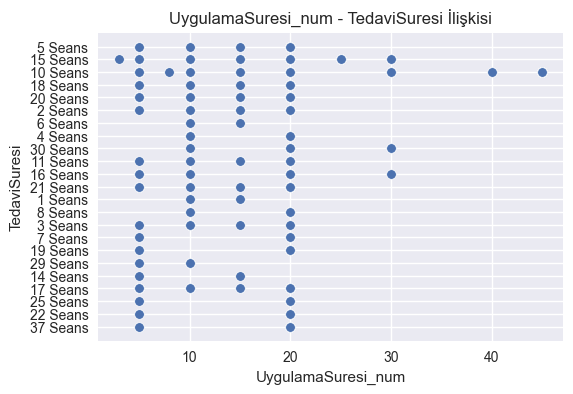

In [45]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=col, y="TedaviSuresi")
    plt.title(f"{col} - TedaviSuresi İlişkisi")
    plt.xlabel(col)
    plt.ylabel("TedaviSuresi")
    plt.show()

C:\Users\zeyne\AppData\Local\Temp\ipykernel_2460\3642422370.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cat, x=col+"_tmp", y="TedaviSuresi", palette="viridis")


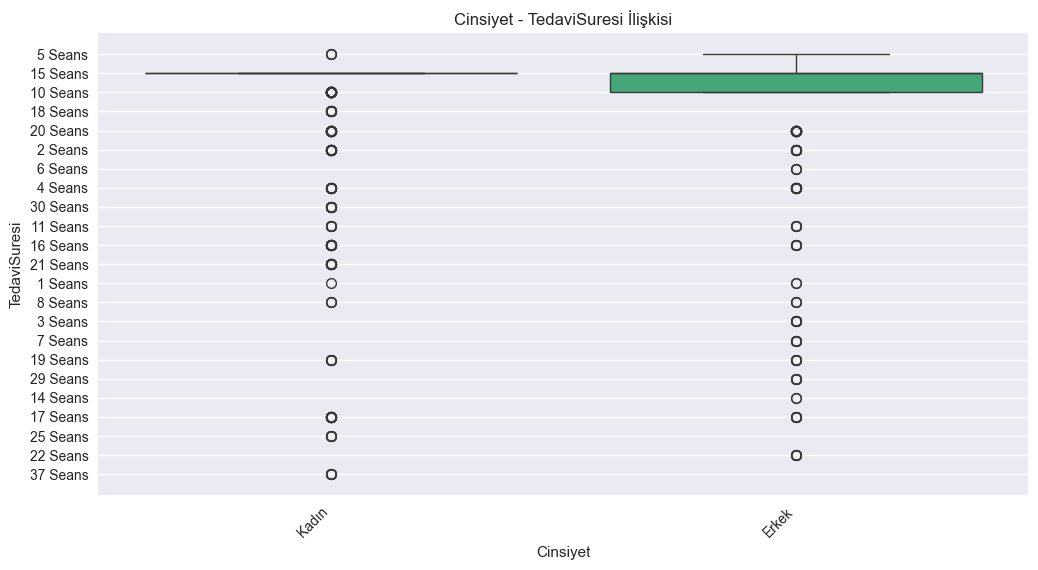

C:\Users\zeyne\AppData\Local\Temp\ipykernel_2460\3642422370.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cat, x=col+"_tmp", y="TedaviSuresi", palette="viridis")


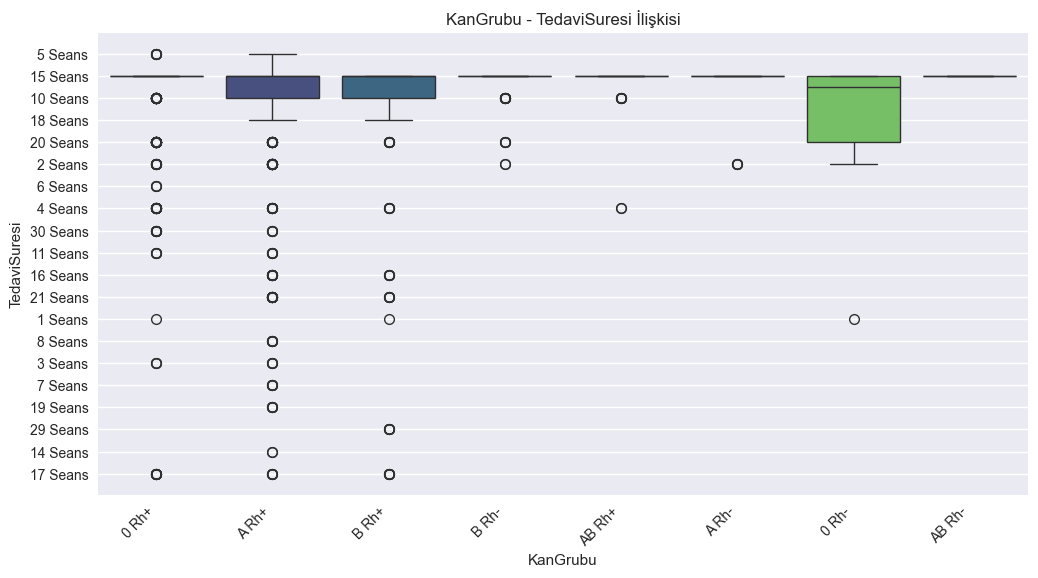

C:\Users\zeyne\AppData\Local\Temp\ipykernel_2460\3642422370.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cat, x=col+"_tmp", y="TedaviSuresi", palette="viridis")


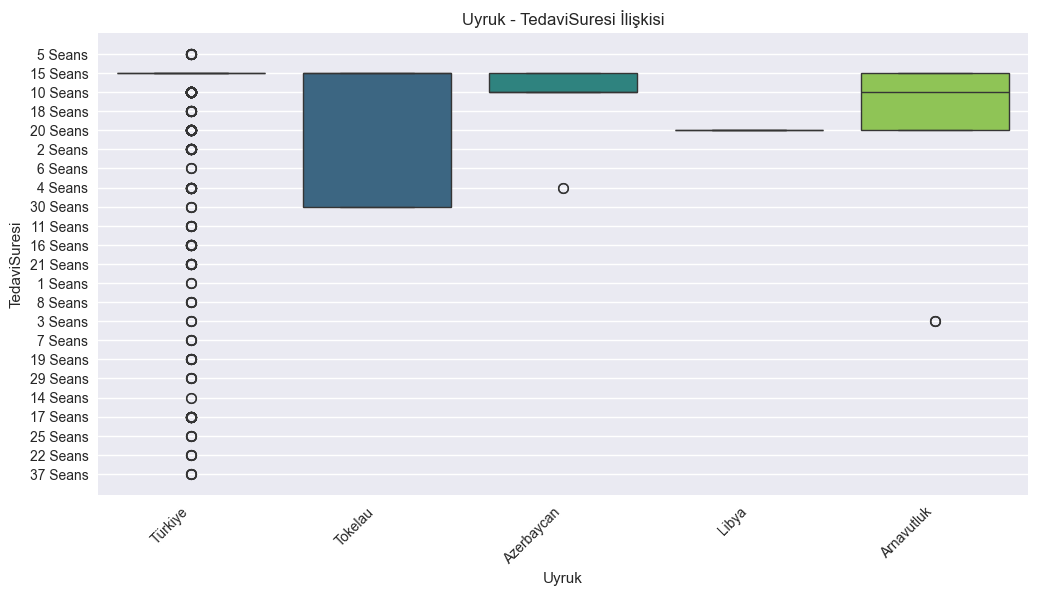

C:\Users\zeyne\AppData\Local\Temp\ipykernel_2460\3642422370.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cat, x=col+"_tmp", y="TedaviSuresi", palette="viridis")


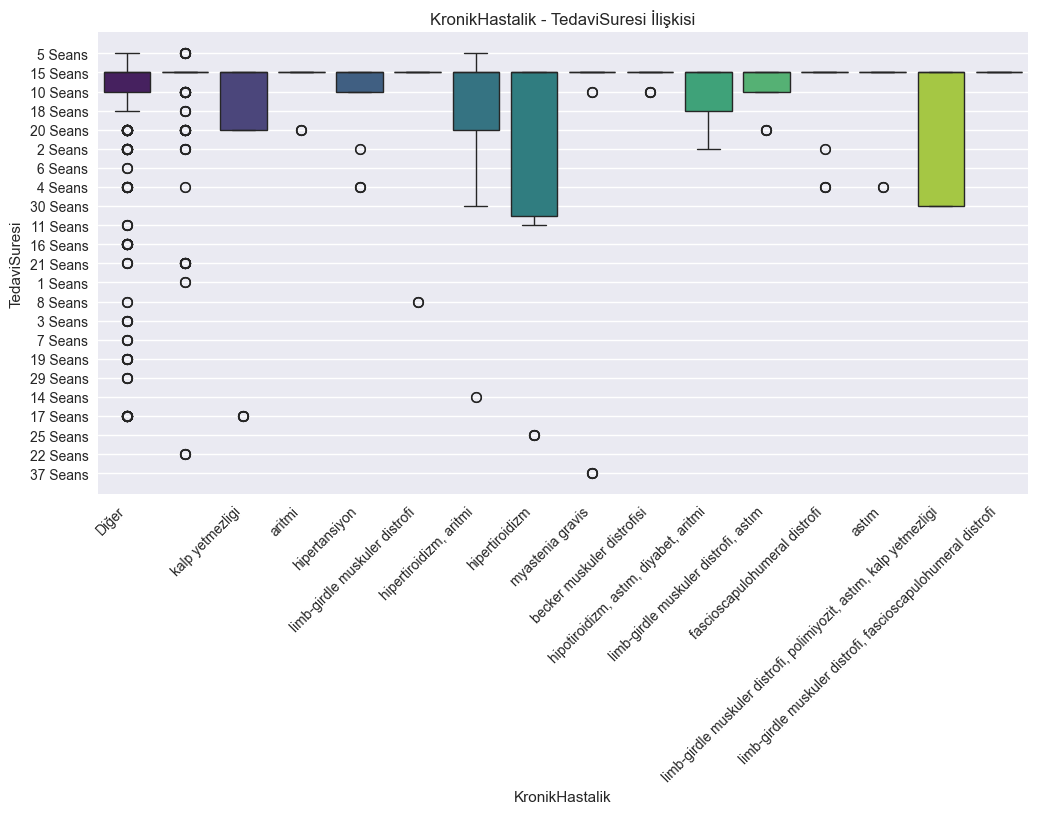

C:\Users\zeyne\AppData\Local\Temp\ipykernel_2460\3642422370.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cat, x=col+"_tmp", y="TedaviSuresi", palette="viridis")


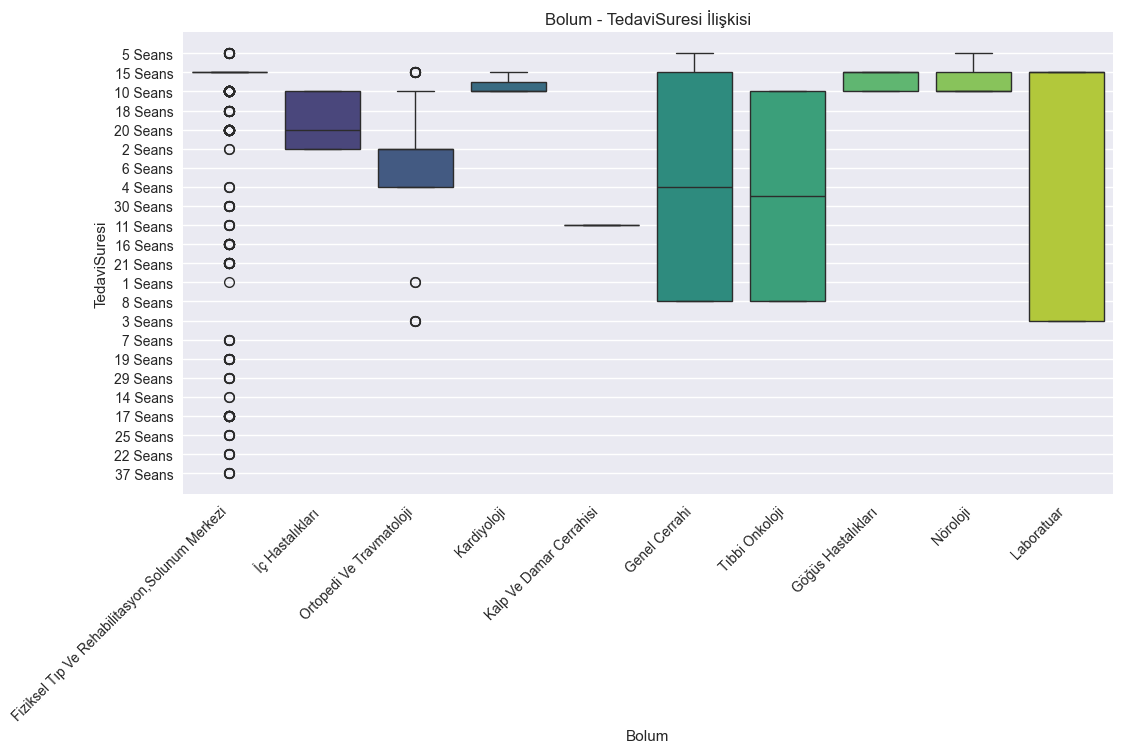

C:\Users\zeyne\AppData\Local\Temp\ipykernel_2460\3642422370.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cat, x=col+"_tmp", y="TedaviSuresi", palette="viridis")


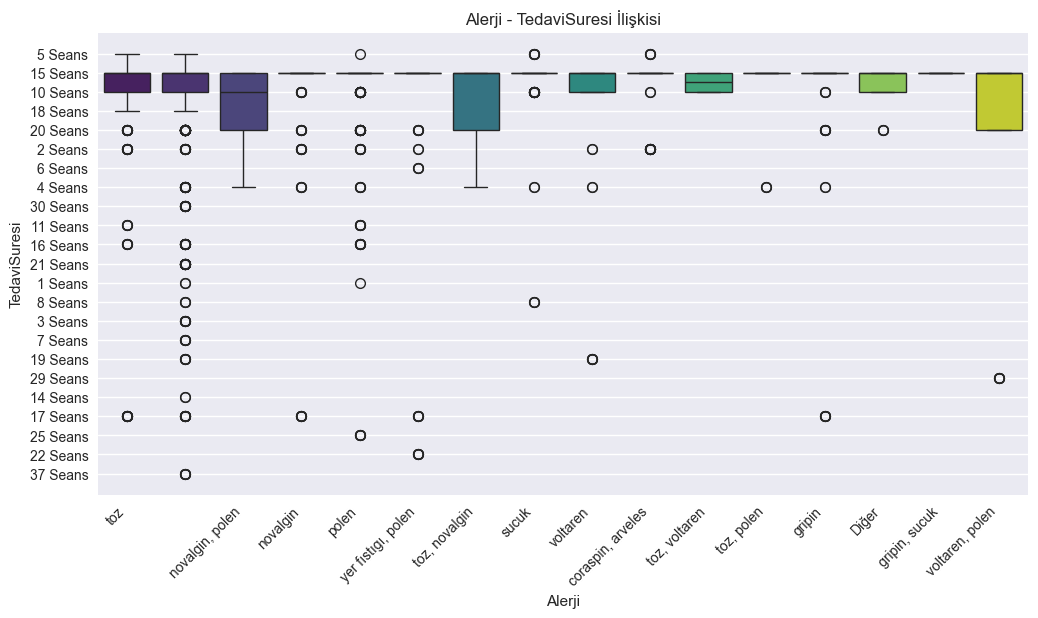

C:\Users\zeyne\AppData\Local\Temp\ipykernel_2460\3642422370.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cat, x=col+"_tmp", y="TedaviSuresi", palette="viridis")


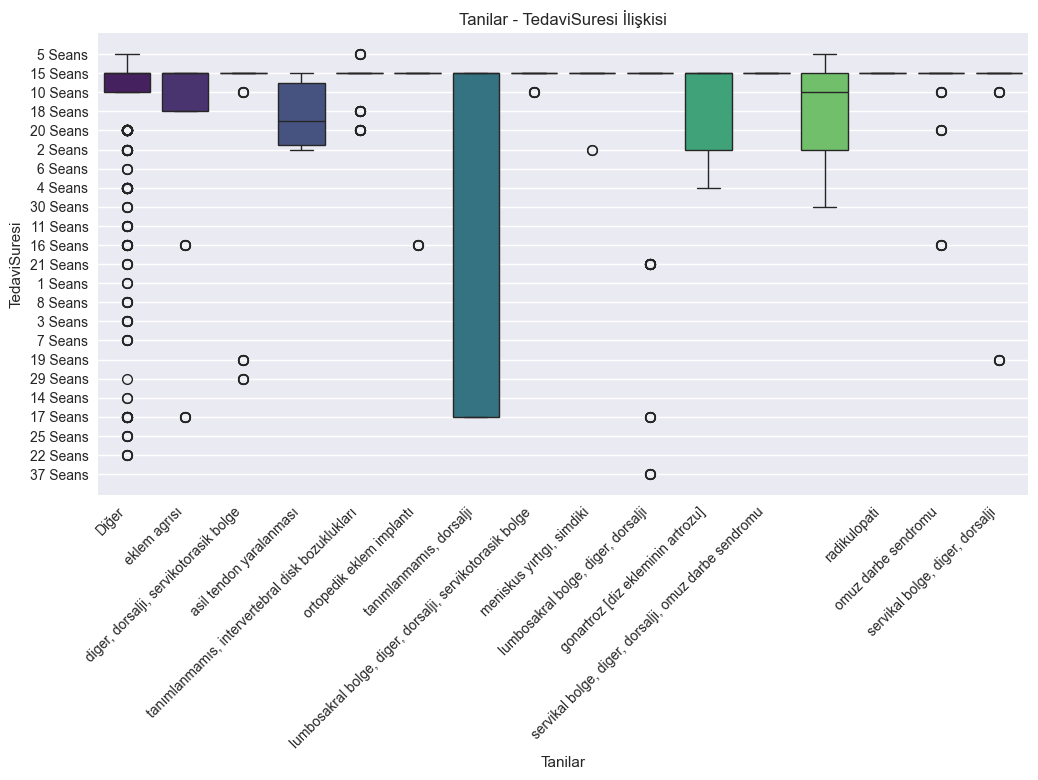

C:\Users\zeyne\AppData\Local\Temp\ipykernel_2460\3642422370.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cat, x=col+"_tmp", y="TedaviSuresi", palette="viridis")


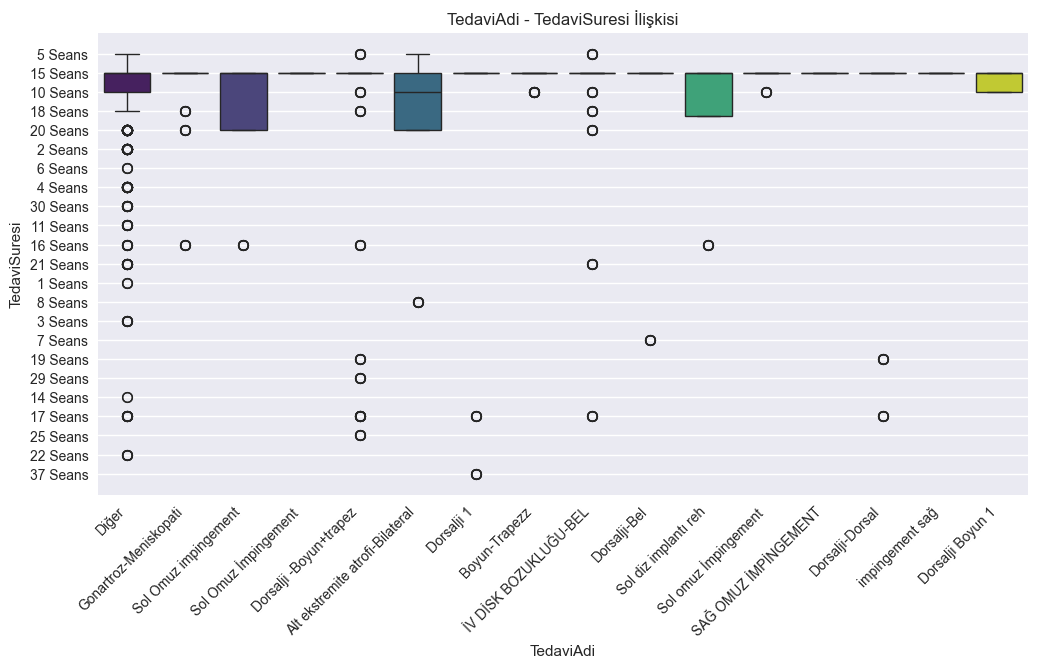

C:\Users\zeyne\AppData\Local\Temp\ipykernel_2460\3642422370.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cat, x=col+"_tmp", y="TedaviSuresi", palette="viridis")


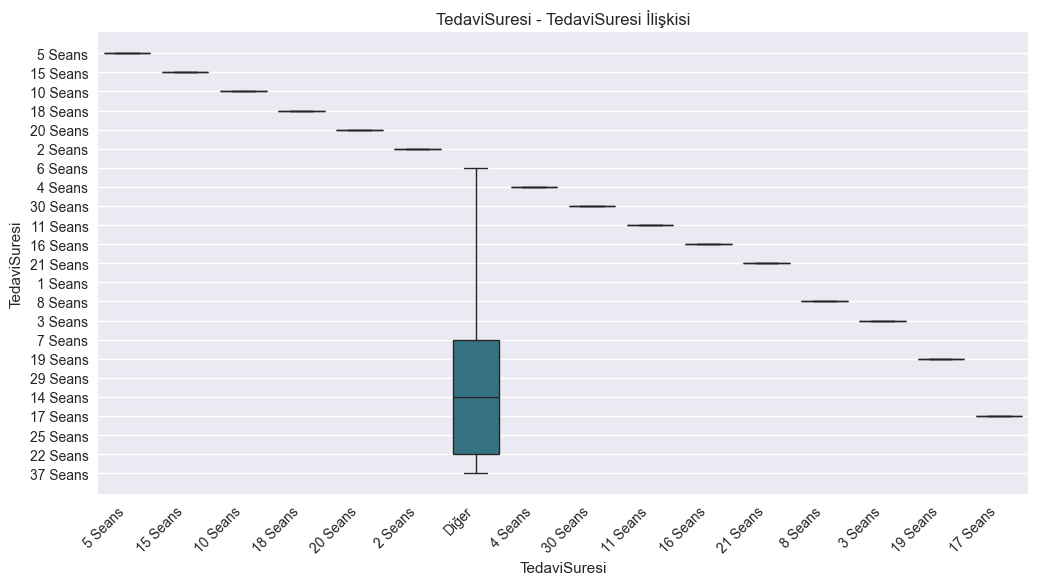

C:\Users\zeyne\AppData\Local\Temp\ipykernel_2460\3642422370.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cat, x=col+"_tmp", y="TedaviSuresi", palette="viridis")


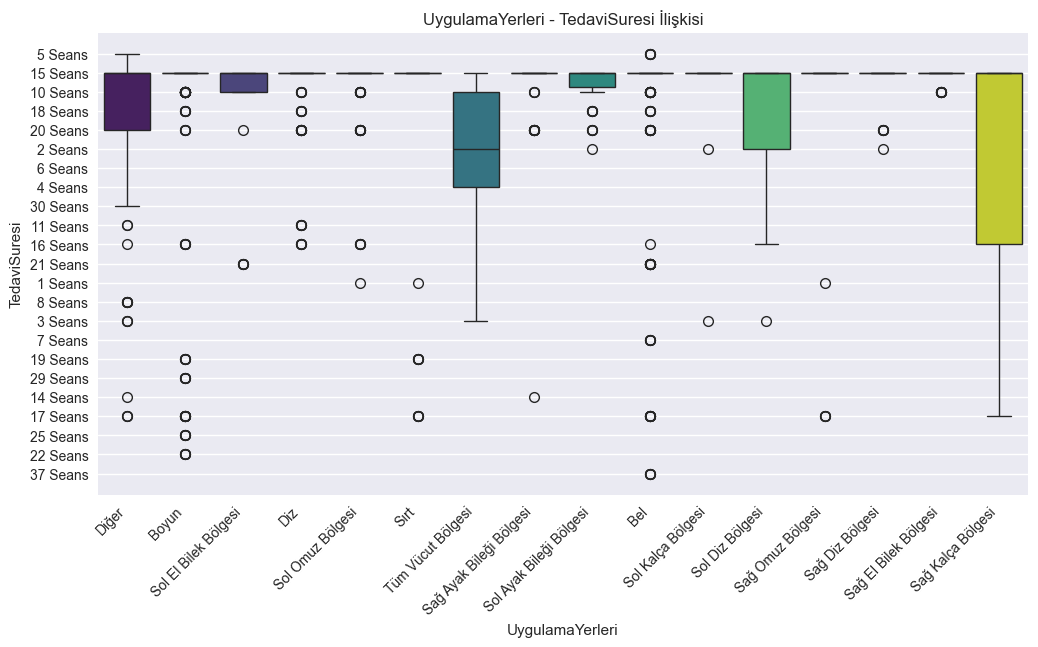

C:\Users\zeyne\AppData\Local\Temp\ipykernel_2460\3642422370.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cat, x=col+"_tmp", y="TedaviSuresi", palette="viridis")


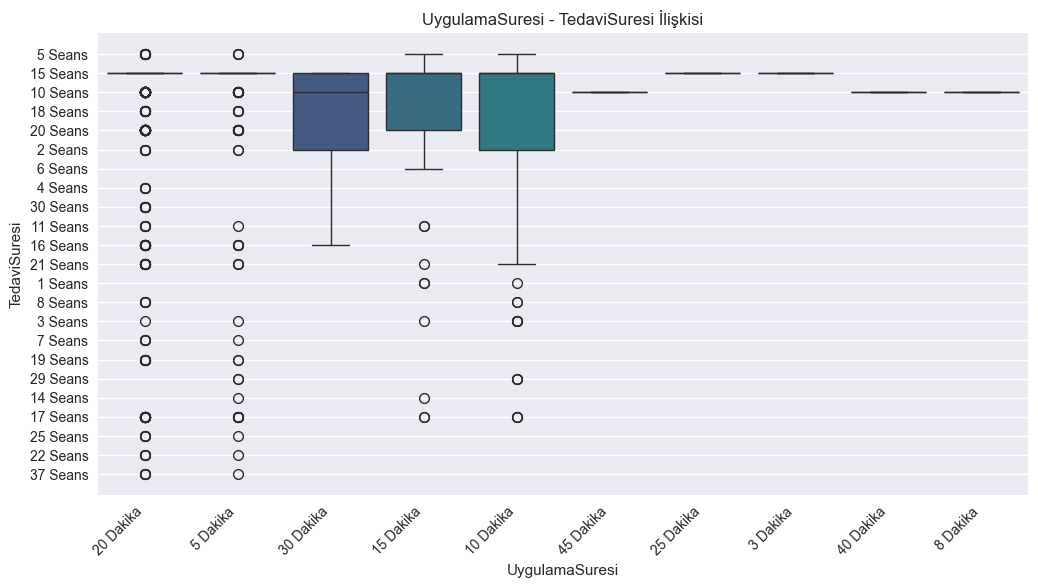

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns


df_cat = df_temiz[cat_cols].copy()
df_cat["TedaviSuresi"] = df_temiz["TedaviSuresi"]  

for col in cat_cols:
   
    df_cat[col] = df_cat[col].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
    
    plt.figure(figsize=(12,6))
    
    
    counts = df_cat[col].value_counts()
    if len(counts) > 15:
        top_labels = counts[:15].index.tolist()
        df_cat[col+"_tmp"] = df_cat[col].where(df_cat[col].isin(top_labels), "Diğer")
    else:
        df_cat[col+"_tmp"] = df_cat[col]
    
    sns.boxplot(data=df_cat, x=col+"_tmp", y="TedaviSuresi", palette="viridis")
    plt.title(f"{col} - TedaviSuresi İlişkisi")
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(col)
    plt.ylabel("TedaviSuresi")
    plt.show()
    
    df_cat.drop(columns=[col+"_tmp"], inplace=True)

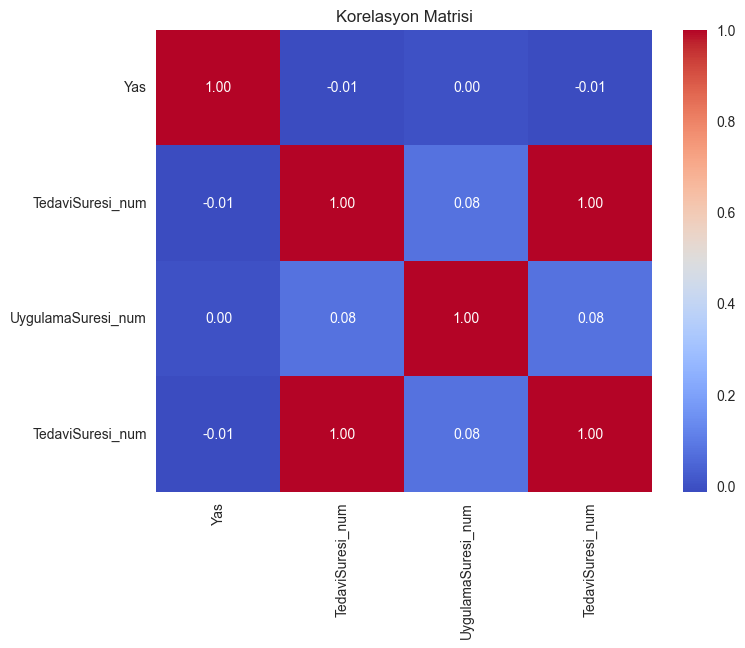

In [47]:
df["TedaviSuresi_num"] = df["TedaviSuresi"].str.extract("(\d+)").astype(float)
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols + ["TedaviSuresi_num"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

AYKİRİ DEGER 

In [48]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
def detect_outliers_combined(df, num_cols, ord_cols=None):
    
    if ord_cols is None:
        ord_cols = []
        
    all_cols = num_cols + ord_cols
    outlier_dict = {}
    
    for col in all_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)].index.tolist()
        outlier_dict[col] = outliers
        
    return outlier_dict

In [50]:
def detect_outliers_iqr(df, cols):
    outlier_dict = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outlier_dict[col] = outliers
        print(f"{col} sütununda {len(outliers)} aykırı değer bulundu.")
    return outlier_dict


numeric_cols = df.select_dtypes(include="number").columns.tolist()
outliers = detect_outliers_iqr(df, numeric_cols)

HastaNo sütununda 0 aykırı değer bulundu.
Yas sütununda 41 aykırı değer bulundu.
TedaviSuresi_num sütununda 565 aykırı değer bulundu.
UygulamaSuresi_num sütununda 12 aykırı değer bulundu.


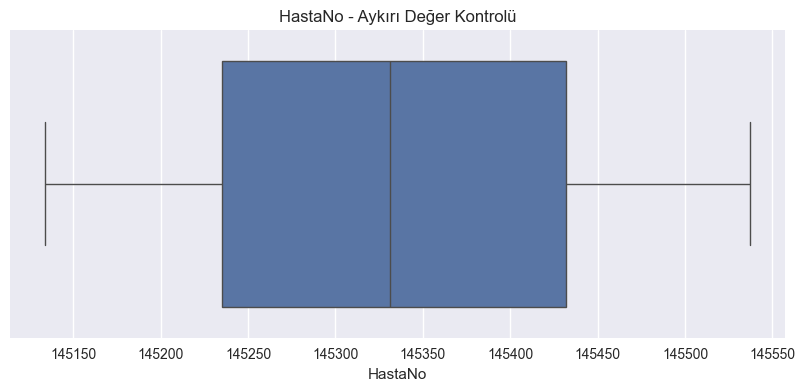

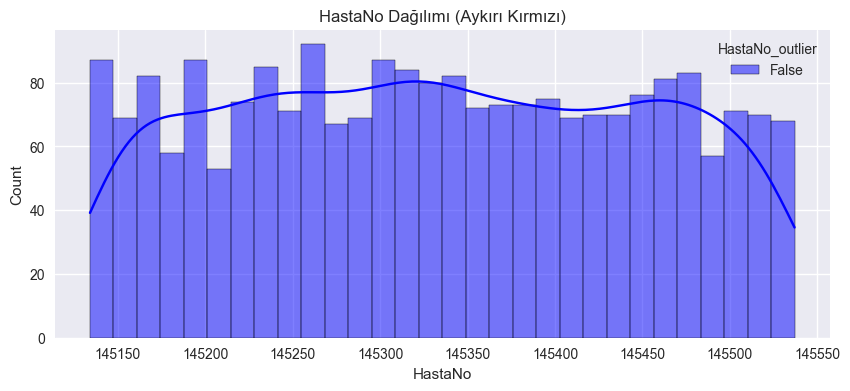

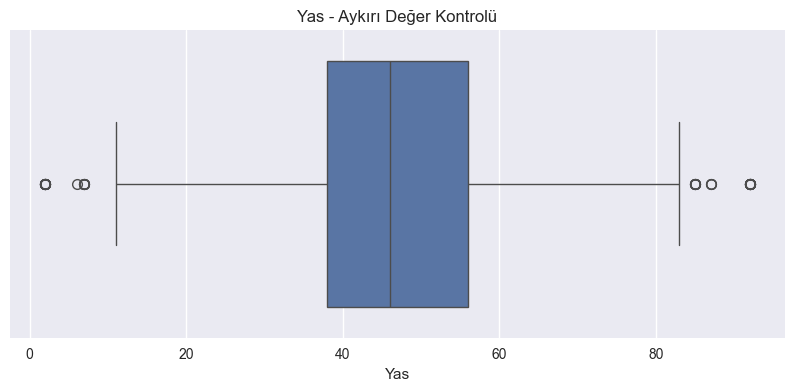

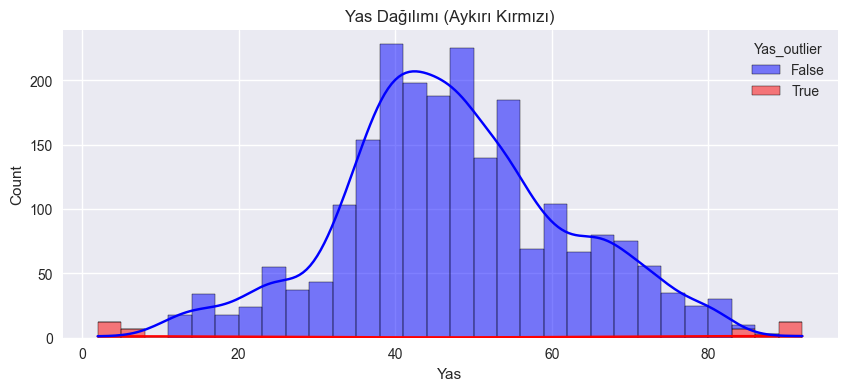

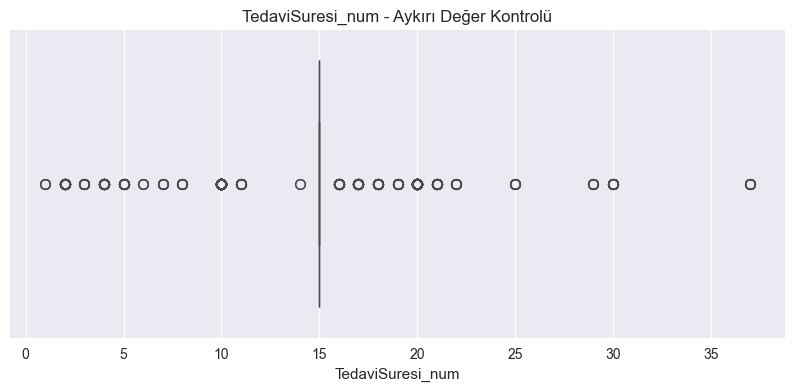

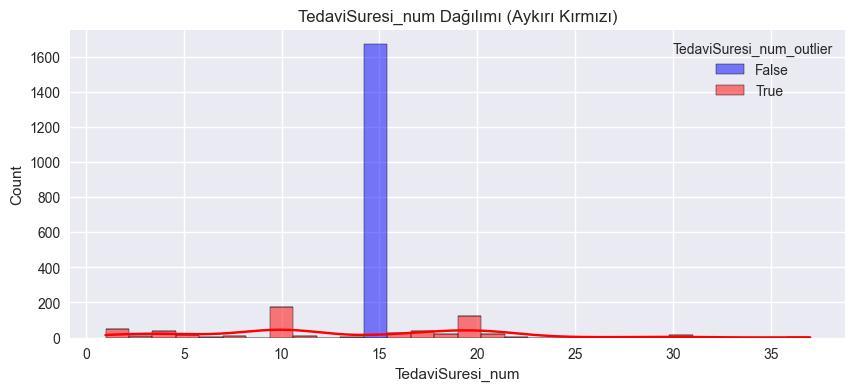

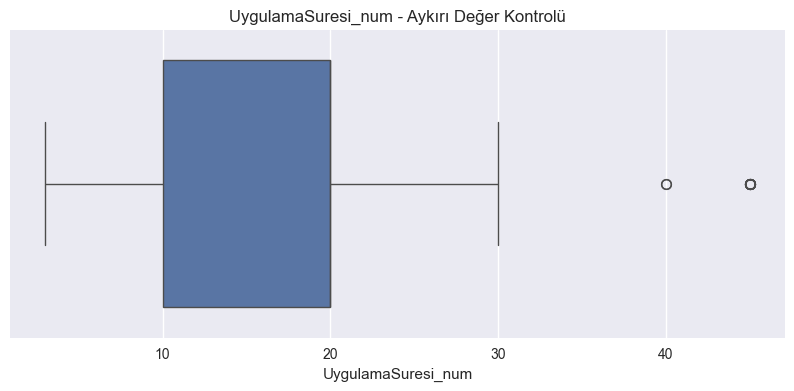

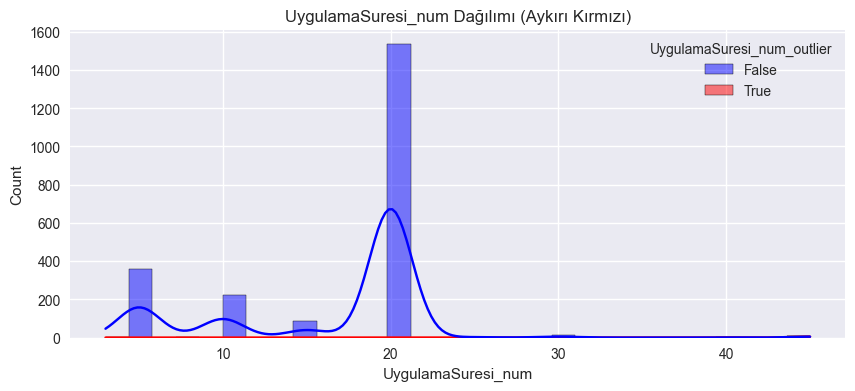

In [51]:
numeric_cols = df.select_dtypes(include="number").columns.tolist()

for col in numeric_cols:
    outlier_indices = outliers[col].index.tolist()
    df[f'{col}_outlier'] = False
    df.loc[outlier_indices, f'{col}_outlier'] = True

    # Boxplot
    plt.figure(figsize=(10,4))
    sns.boxplot(x=col, data=df)
    plt.title(f"{col} - Aykırı Değer Kontrolü")
    plt.show()
    
    # Histogram
    plt.figure(figsize=(10,4))
    sns.histplot(
        data=df,
        x=col,
        bins=30,
        kde=True,
        hue=f'{col}_outlier',
        palette={False:'blue', True:'red'},
        multiple="stack"
    )
    plt.title(f"{col} Dağılımı (Aykırı Kırmızı)")
    plt.show()

In [52]:
Q1 = df['Yas'].quantile(0.25)
Q3 = df['Yas'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['Yas'] < lower) | (df['Yas'] > upper)]
print("Yaş kolonundaki aykırı değerler:")
print(outliers['Yas'])

Yaş kolonundaki aykırı değerler:
46      92
47      92
48      92
49      92
50      92
51      92
52      92
100     85
101     85
102     85
103     85
349      2
350      2
351      2
352      2
353      2
354      2
355      2
356      2
357      2
358      2
359      2
360      2
693     92
694     92
695     92
696     92
697     92
1679    85
1680    85
1681    85
1940     7
1941     7
1942     7
1943     7
1944     7
1945     7
1998    87
1999    87
2000    87
2025     6
Name: Yas, dtype: int64


EKSİK DEĞER İSLEME

In [53]:
import pandas as pd

numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()


for col in numeric_cols:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)


for col in categorical_cols:
    mode_value = df[col].mode()[0] 
    df[col].fillna(mode_value, inplace=True)


missing_counts_after = df.isnull().sum()
print("Eksik değer sayısı doldurma sonrası:\n", missing_counts_after[missing_counts_after > 0])

Eksik değer sayısı doldurma sonrası:
 Series([], dtype: int64)


In [54]:
print(" Eksik değer sayıları:")
print(df.isnull().sum())

 Eksik değer sayıları:
HastaNo                       0
Yas                           0
Cinsiyet                      0
KanGrubu                      0
Uyruk                         0
KronikHastalik                0
Bolum                         0
Alerji                        0
Tanilar                       0
TedaviAdi                     0
TedaviSuresi                  0
UygulamaYerleri               0
UygulamaSuresi                0
TedaviSuresi_num              0
UygulamaSuresi_num            0
HastaNo_outlier               0
Yas_outlier                   0
TedaviSuresi_num_outlier      0
UygulamaSuresi_num_outlier    0
dtype: int64


In [57]:
print(df[num_cols].mean()) 
print(df[num_cols].std()) 

Yas                   47.327069
TedaviSuresi_num      14.570917
UygulamaSuresi_num    16.573154
dtype: float64
Yas                   15.208634
TedaviSuresi_num       3.725322
UygulamaSuresi_num     6.268635
dtype: float64


Sayısal kolonları standartlaştır

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Sayısal değişkenler ölçeklendi.")

Sayısal değişkenler ölçeklendi.


In [59]:
print(df[num_cols].mean())  
print(df[num_cols].std()) 

Yas                  -1.525998e-16
TedaviSuresi_num     -1.430623e-17
UygulamaSuresi_num   -1.422675e-16
dtype: float64
Yas                   1.000224
TedaviSuresi_num      1.000224
UygulamaSuresi_num    1.000224
dtype: float64


In [60]:
def multi_label_binarizer(df, column_name):
    
    df[column_name] = df[column_name].fillna("")
    split_series = df[column_name].apply(lambda x: [i.strip() for i in x.split(",") if i != ""])
    unique_vals = sorted(set(sum(split_series.tolist(), [])))

    for val in unique_vals:
        df[f"{column_name}_{val}"] = split_series.apply(lambda x: 1 if val in x else 0)
    
    return df

In [61]:
from sklearn.preprocessing import OneHotEncoder

In [62]:
multi_label_cols = ["KronikHastalik", "Alerji"]
for col in multi_label_cols:
    df = multi_label_binarizer(df, col)


existing_cat_cols = [col for col in cat_cols if col in df.columns and col not in multi_label_cols]


ohe = OneHotEncoder(sparse_output=False, drop="first")  # drop="first" → dummy trap önleme
encoded = ohe.fit_transform(df[existing_cat_cols])


encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(existing_cat_cols), index=df.index)


df = pd.concat([df.drop(columns=existing_cat_cols), encoded_df], axis=1)

print("Tüm kategorik değişkenler güvenli şekilde encode edildi.")

Tüm kategorik değişkenler güvenli şekilde encode edildi.


In [63]:
print(existing_cat_cols)

['Cinsiyet', 'KanGrubu', 'Uyruk', 'Bolum', 'Tanilar', 'TedaviAdi', 'TedaviSuresi', 'UygulamaYerleri', 'UygulamaSuresi']


In [64]:
print(df.columns)

Index(['HastaNo', 'Yas', 'KronikHastalik', 'Alerji', 'TedaviSuresi_num',
       'UygulamaSuresi_num', 'HastaNo_outlier', 'Yas_outlier',
       'TedaviSuresi_num_outlier', 'UygulamaSuresi_num_outlier',
       ...
       'UygulamaYerleri_Yüz', 'UygulamaSuresi_15 Dakika',
       'UygulamaSuresi_20 Dakika', 'UygulamaSuresi_25 Dakika',
       'UygulamaSuresi_3 Dakika', 'UygulamaSuresi_30 Dakika',
       'UygulamaSuresi_40 Dakika', 'UygulamaSuresi_45 Dakika',
       'UygulamaSuresi_5 Dakika', 'UygulamaSuresi_8 Dakika'],
      dtype='object', length=738)


In [65]:
import pandas as pd


all_cols = df.columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()


status_df = pd.DataFrame({
    'Column': all_cols,
    'Type': ['Numeric' if col in num_cols else 'Categorical' for col in all_cols],
    'Exists in df': [col in df.columns for col in all_cols]
})


print(status_df)

                       Column         Type  Exists in df
0                     HastaNo      Numeric          True
1                         Yas      Numeric          True
2              KronikHastalik  Categorical          True
3                      Alerji  Categorical          True
4            TedaviSuresi_num      Numeric          True
..                        ...          ...           ...
733  UygulamaSuresi_30 Dakika      Numeric          True
734  UygulamaSuresi_40 Dakika      Numeric          True
735  UygulamaSuresi_45 Dakika      Numeric          True
736   UygulamaSuresi_5 Dakika      Numeric          True
737   UygulamaSuresi_8 Dakika      Numeric          True

[738 rows x 3 columns]


In [66]:
print(df.dtypes)

HastaNo                       int64
Yas                         float64
KronikHastalik               object
Alerji                       object
TedaviSuresi_num            float64
                             ...   
UygulamaSuresi_30 Dakika    float64
UygulamaSuresi_40 Dakika    float64
UygulamaSuresi_45 Dakika    float64
UygulamaSuresi_5 Dakika     float64
UygulamaSuresi_8 Dakika     float64
Length: 738, dtype: object


In [67]:
numeric_cols = df.select_dtypes(include=['number']).columns
print("Sayısal sütunlar:", numeric_cols)

Sayısal sütunlar: Index(['HastaNo', 'Yas', 'TedaviSuresi_num', 'UygulamaSuresi_num',
       'KronikHastalik_Aritmi', 'KronikHastalik_Astım',
       'KronikHastalik_Becker Musküler Distrofisi', 'KronikHastalik_Diyabet',
       'KronikHastalik_Duchenne Musküler Distrofisi',
       'KronikHastalik_Fascioscapulohumeral Distrofi',
       ...
       'UygulamaYerleri_Yüz', 'UygulamaSuresi_15 Dakika',
       'UygulamaSuresi_20 Dakika', 'UygulamaSuresi_25 Dakika',
       'UygulamaSuresi_3 Dakika', 'UygulamaSuresi_30 Dakika',
       'UygulamaSuresi_40 Dakika', 'UygulamaSuresi_45 Dakika',
       'UygulamaSuresi_5 Dakika', 'UygulamaSuresi_8 Dakika'],
      dtype='object', length=732)


In [69]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Kategorik sütunlar:", categorical_cols)

Kategorik sütunlar: Index(['KronikHastalik', 'Alerji'], dtype='object')
